<a href="https://colab.research.google.com/github/AvishekBis/CSE-314-Data-Communication-Sessional-/blob/main/CSE_314_GAN_for_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Course: CSE-314 Data Communication (Seesional)**
# **ID: 2104097**

# **Project Name\:** GAN for anomaly detection

# **Introduction**

With the rapid expansion of network systems and online infrastructure, the risk of cyber-attacks and system intrusions has increased significantly. Traditional static models often fail to detect novel or sophisticated attacks. Therefore, using Generative Adversarial Networks (GANs) alongside classical machine learning models provides a promising way to detect anomalies dynamically. This project leverages a hybrid detection system combining deep learning (GANs) and conventional classification algorithms to detect anomalous activities from the NSL-KDD (corrected.gz) intrusion dataset.

# **Objectives**
  1.To preprocess and prepare the dataset for training.

  2.To implement a Generative Adversarial Network (GAN) for modeling normal data behavior.

  3.To train the GAN and use its discriminator for anomaly detection.

  4.To evaluate model performance using various threshold values and metrics.

  5.To compare GAN results with traditional models: Random Forest, KNN, and Logistic Regression.

# **Description**

The dataset consists of network traffic features along with a label indicating whether the data represents normal or attack behavior. After preprocessing steps, such as label encoding and feature selection, the labels are converted to binary format — 0 for normal and 1 for attack. Feature selection focuses on attributes like dst_bytes, logged_in, count, etc., that capture significant behavioral patterns in network activity.

To train the GAN, a subset of only normal data is used so that the generator learns to recreate genuine behavior. The generator takes in random noise vectors and produces synthetic samples that resemble normal traffic. The discriminator is trained to distinguish between real (normal) data and fake (generated) data. After training, the discriminator is used on real, unseen data (both normal and attack) to score how "real" the data is. Lower scores indicate anomalies.

Performance evaluation is conducted using precision, recall, F1-score, and accuracy by varying the threshold values for discriminator output. Finally, for benchmarking, classical ML classifiers (Random Forest, KNN, Logistic Regression) are trained on the same dataset, and their accuracies are compared.

# **Code Description**

The code is implemented in Google Colab using Python with libraries such as TensorFlow, Pandas, NumPy, Matplotlib, Scikit-learn, and Seaborn. Below is a breakdown of the code modules and their functions:

**Data Loading & Preprocessing:**

   The corrected.gz file is loaded using Pandas. Non-essential columns are removed, and only selected numerical features are retained. The label column is converted to binary (0 for normal., 1 otherwise). Label encoding is applied to ensure all features are numeric.

   Sampling for GAN Training:
   A random subset of 500 normal instances is used to train the GAN. This subset ensures the generator only learns from clean, non-anomalous data. The label column is dropped from this training set.

  **GAN Architecture:**

  The Generator is a deep neural network that takes a 100-dimensional noise vector and outputs an 8-feature synthetic sample.

  The Discriminator is another neural network that takes real or fake samples and tries to classify them. It has dropout layers to avoid overfitting.

   Both networks are trained simultaneously using adversarial loss (Binary Crossentropy), where the generator tries to fool the discriminator.

  **Training the GAN:**
  The train_step() function performs one training iteration, updating both networks using tf.GradientTape. Training is done over 1000 epochs, and the generator/discriminator losses are stored and plotted using Matplotlib.

  **Discriminator Evaluation:**
  The trained discriminator is used to predict "realness" scores for the test set (containing both normal and anomaly). A range of thresholds is applied to these scores to convert them into binary predictions (normal vs anomaly), and various metrics (F1, precision, recall, accuracy) are computed.

  **Traditional ML Models:**

  The same dataset is used to train:

  Random Forest Classifier

  K-Nearest Neighbors (KNN)

  Logistic Regression

  Each model is evaluated using accuracy score, and their results are compared to the GAN-based method.

  **Visualization:**
  Graphs of loss curves and predicted score distributions are plotted to visually assess model performance.

This modular pipeline ensures flexibility and clarity between preprocessing, deep learning, and classical machine learning components.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving corrected.gz to corrected.gz


In [ ]:
# Show plots inline
%matplotlib inline

# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Upload the 'corrected.gz' dataset
from google.colab import files
uploaded = files.upload()

# Load the .gz file into a DataFrame (assuming it’s a CSV)
df = pd.read_csv("corrected.gz", header=None)

# Display first 5 rows to verify
df.head()



  Show plots inline: %matplotlib inline is a magic command that ensures matplotlib plots are displayed directly within the notebook.
  Import required libraries: Imports essential libraries like numpy, pandas, seaborn, matplotlib.pyplot, classification_report, confusion_matrix, tensorflow, time, train_test_split, and LabelEncoder.
  Upload the 'corrected.gz' dataset: from google.colab import files and uploaded = files.upload() allow you to upload a file from your local machine to the Colab environment. In this case, it's expecting the corrected.gz file.
  Load the .gz file into a DataFrame: df = pd.read_csv("corrected.gz", header=None) reads the uploaded corrected.gz file into a pandas DataFrame. It assumes the file is a CSV and sets header=None because the file doesn't have a header row.
  Display first 5 rows to verify: df.head() displays the first five rows of the DataFrame. This is a quick way to inspect the data and ensure it was loaded correctly.


In [28]:
# Upload the corrected.gz file from local system
from google.colab import files
uploaded = files.upload()

# Set up dtype dictionary
import numpy as np
import pandas as pd

dtypes = {
    "duration": np.int8,
    "protocol_type": object,
    "service": object,
    "flag": object,
    "src_bytes": np.int8,
    "dst_bytes": np.int8,
    "land": np.int8,
    "wrong_fragment": np.int8,
    "urgent": np.int8,
    "hot": np.int8,
    "m_failed_logins": np.int8,
    "logged_in": np.int8,
    "num_compromised": np.int8,
    "root_shell": np.int8,
    "su_attempted": np.int8,
    "num_root": np.int8,
    "num_file_creations": np.int8,
    "num_shells": np.int8,
    "num_access_files": np.int8,
    "num_outbound_cmds": np.int8,
    "is_host_login": np.int8,
    "is_guest_login": np.int8,
    "count": np.int8,
    "srv_count": np.int8,
    "serror_rate": np.float16,
    "srv_serror_rate": np.float16,
    "rerror_rate": np.float16,
    "srv_rerror_rate": np.float16,
    "same_srv_rate": np.float16,
    "diff_srv_rate": np.float16,
    "srv_diff_host_rate": np.float16,
    "dst_host_count": np.int8,
    "dst_host_srv_count": np.int8,
    "dst_host_same_srv_rate": np.float16,
    "dst_host_diff_srv_rate": np.float16,
    "dst_host_same_src_port_rate": np.float16,
    "dst_host_srv_diff_host_rate": np.float16,
    "dst_host_serror_rate": np.float16,
    "dst_host_srv_serror_rate": np.float16,
    "dst_host_rerror_rate": np.float16,
    "dst_host_srv_rerror_rate": np.float16,
    "label": object
}

# Column names for the dataset
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
    "wrong_fragment","urgent","hot","m_failed_logins","logged_in", "num_compromised",
    "root_shell","su_attempted","num_root","num_file_creations","num_shells",
    "num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
    "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
    "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]

# Read the uploaded corrected.gz file
df = pd.read_csv("corrected.gz", compression="gzip", names=columns, dtype=dtypes)

# Display first few rows
df.head()
df.label.value_counts()

Saving corrected.gz to corrected (3).gz


,count
label,
smurf.,164091
normal.,60593
neptune.,58001
snmpgetattack.,7741
mailbomb.,5000
guess_passwd.,4367
snmpguess.,2406
satan.,1633
warezmaster.,1602



  Upload the corrected.gz file: from google.colab import files and uploaded = files.upload() are used to upload the file from your local system to the Colab environment.
  Set up dtype dictionary: A dictionary dtypes is created to specify the data type for each column in the dataset. This is important for ensuring that the data is read in the correct format, especially for numerical columns, and can help manage memory usage.
  Column names for the dataset: A list columns is defined, containing the names for all 42 columns in the dataset.
  Read the uploaded corrected.gz file: df = pd.read_csv("corrected.gz", compression="gzip", names=columns, dtype=dtypes) reads the corrected.gz file.
        "corrected.gz": Specifies the file to read.
        compression="gzip": Tells pandas to decompress the file using gzip.
        names=columns: Assigns the names from the columns list to the DataFrame's columns.
        dtype=dtypes: Applies the specified data types from the dtypes dictionary to the respective columns.
  Display first few rows: df.head() displays the first five rows of the DataFrame to verify that the data has been loaded correctly with the specified column names and (implicitly) the correct data types.
  Display label value counts: df.label.value_counts() counts the occurrences of each unique value in the 'label' column and displays the result. This gives you an overview of the distribution of different attack types and normal traffic in the dataset.


The last executed cell displays the count of each unique value in the 'label' column of the df DataFrame. This shows the distribution of different types of network traffic or attacks within the dataset.

In [8]:
new_features = [
    'dst_bytes',
    'logged_in',
    'count',
    'srv_count',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_same_src_port_rate',
    'label'
]

df_new = df[new_features]

# Display first 5 rows
df_new.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,-110,0,1,1,-1,-2,1.0,0.000000,normal.
1,-110,0,1,1,-1,-2,1.0,0.000000,normal.
2,-110,0,1,1,-1,-2,1.0,0.000000,normal.
3,-110,0,2,2,-1,-2,1.0,0.000000,snmpgetattack.
4,-110,0,2,2,-1,-2,1.0,0.010002,snmpgetattack.


The last executed cell selects a subset of columns from the df DataFrame and creates a new DataFrame called df_new with these selected columns. The selected columns are: 'dst_bytes', 'logged_in', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', and 'label'. Finally, it displays the first 5 rows of the new df_new DataFrame.

In [9]:
# 1. Convert 'normal.' to 0 (benign), everything else to 1 (attack)
df.label = df.label.apply(lambda x: 0 if x == 'normal.' else 1)

# 2. Filter only selected features (including label)
df = df[new_features]

# 3. Encode object-type columns (categorical)
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == object:
        encoded = LabelEncoder()
        df[column] = encoded.fit_transform(df[column])

# 4. Sample 500 benign (label == 0) records for training
df_train = df[df.label == 0].sample(500, random_state=42)

# 5. Remove sampled data from main dataset
df = df.drop(df_train.index)

# 6. Drop the label column from training set
df_train = df_train.drop('label', axis=1)

# 7. Final shape of training set
df_train.shape


(500, 8)



Converts the 'label' column: It transforms the 'label' column into a binary classification problem. 'normal.' is converted to 0 (representing benign traffic), and all other values are converted to 1 (representing attack traffic).
Filters selected features: It keeps only the columns specified in the new_features list (which includes the transformed 'label' column) in the df DataFrame.
Encodes categorical columns: It iterates through the columns of the modified df DataFrame. If a column has an 'object' data type (indicating it's categorical), it uses LabelEncoder to convert the categorical values into numerical labels.
Samples training data: It selects 500 rows from the df DataFrame where the 'label' is 0 (benign traffic) and assigns them to a new DataFrame called df_train. This is likely done to create a balanced or specific training set for a model.
Removes sampled data: It removes the rows that were sampled for df_train from the original df DataFrame.
Drops the label column from training set: It removes the 'label' column from the df_train DataFrame, as this will be the feature set for training a model.
Displays training set shape: It prints the shape (number of rows and columns) of the final df_train DataFrame.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(8))  # output matches df_train features
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=[8]))  # corrected input shape
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))  # Output: real (1) or fake (0)
    return model

# Instantiate models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Test binary cross-entropy
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
loss = bce(tf.ones(4), tf.zeros(4))  # max mismatch, should return high loss
print('Sample BCE loss:', loss.numpy())



  Imports TensorFlow and Layers: Imports the necessary tensorflow library and the layers module from tensorflow.keras.
  make_generator_model() function:
        This function defines the Generator model as a tf.keras.Sequential model.
        It takes a 100-dimensional noise vector as input (input_shape=(100,)).
        It consists of several Dense layers with increasing numbers of units (16, 16, 32) followed by BatchNormalization and LeakyReLU activation functions.
        The final Dense layer has 8 units, which is intended to match the number of features in your training data (df_train). The generator's goal is to produce synthetic data samples that have the same dimensionality and characteristics as the real data.
        It returns the constructed generator model.
  make_discriminator_model() function:
        This function defines the Discriminator model, also as a tf.keras.Sequential model.
        It takes input data (either real or generated) with a shape of 8 features (input_shape=[8]).
        It consists of Dense layers (16, 32) followed by LeakyReLU activation and Dropout layers (with a rate of 0.3) to help prevent overfitting.
        The final Dense layer has 1 unit and no activation (implicitly linear). This output represents the raw prediction (logits) of whether the input data is real or fake.
        It returns the constructed discriminator model.
  Instantiate models: Creates instances of the generator and discriminator models by calling the respective functions.
   Loss functions:
        cross_entropy: Defines a tf.keras.losses.BinaryCrossentropy loss function with from_logits=True. This loss is suitable for binary classification tasks (real vs. fake) and expects raw, unscaled predictions (logits) from the model.
        discriminator_loss(real_output, fake_output): This function calculates the total loss for the discriminator. It calculates the cross-entropy between the discriminator's output on real data (real_output) and a tensor of ones (representing the target of "real"), and adds it to the cross-entropy between the discriminator's output on fake data (fake_output) and a tensor of zeros (representing the target of "fake"). The discriminator tries to minimize this total loss by correctly classifying real data as real and fake data as fake.
        generator_loss(fake_output): This function calculates the loss for the generator. It calculates the cross-entropy between the discriminator's output on fake data (fake_output) and a tensor of ones (representing the target of "real"). The generator tries to minimize this loss by generating fake data that the discriminator classifies as real.
  Test binary cross-entropy: This section includes a small test to demonstrate how the binary cross-entropy loss works when there is a maximum mismatch between the true labels (all ones) and the predicted logits (all zeros). It prints the resulting high loss value.


In [11]:
import tensorflow as tf

bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())


Loss:  1.1920929e-07


In [12]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


The last two executed cells are related to setting up the loss functions for the Generative Adversarial Network (GAN) models.

The second to last calculates and prints a sample Binary Crossentropy (BCE) loss using tf.keras.losses.BinaryCrossentropy(). It provides inputs where the true labels are all 1.0 and the predicted values are also all 1.0. This is a test to show that when the predictions perfectly match the true labels, the BCE loss is very close to zero, as expected.

The last cell  redefines the generator_loss function. This function calculates the loss for the generator model in the GAN. It takes the fake_output (the discriminator's predictions on the generated fake data) as input and uses the cross_entropy loss function (which was defined in cell 1tKbcXVK5oHk as tf.keras.losses.BinaryCrossentropy(from_logits=True)) to compare these predictions to a tensor of ones (tf.ones_like(fake_output)). The goal of the generator is to produce fake data that is so realistic that the discriminator predicts it as real (close to 1), so the generator's loss is minimized when the discriminator's output for fake data is close to 1.


In [16]:
@tf.function
def train_step(real_images):
    # real_images: shape (BATCH_SIZE, 8)

    noise = tf.random.normal([BATCH_SIZE, noise_dim])  # input to generator

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss
    # Convert df_train to tf.data.Dataset
import tensorflow as tf

BATCH_SIZE = 64
noise_dim = 100
EPOCHS = 1000

train_dataset = tf.data.Dataset.from_tensor_slices(df_train.values.astype('float32'))
train_dataset = train_dataset.shuffle(buffer_size=500).batch(BATCH_SIZE, drop_remainder=True)



In [17]:
# Convert df_train to tf.data.Dataset
import tensorflow as tf

BATCH_SIZE = 64
noise_dim = 100
EPOCHS = 1000

train_dataset = tf.data.Dataset.from_tensor_slices(df_train.values.astype('float32'))
train_dataset = train_dataset.shuffle(buffer_size=500).batch(BATCH_SIZE, drop_remainder=True)


The last two executed cells are related to setting up the loss functions for the Generative Adversarial Network (GAN) models.

The second to last cell (cell 8U2fIAVu6OCA) calculates and prints a sample Binary Crossentropy (BCE) loss using tf.keras.losses.BinaryCrossentropy(). It provides inputs where the true labels are all 1.0 and the predicted values are also all 1.0. This is a test to show that when the predictions perfectly match the true labels, the BCE loss is very close to zero, as expected.

The last cell (cell G8cWHdJ06fEj) redefines the generator_loss function. This function calculates the loss for the generator model in the GAN. It takes the fake_output (the discriminator's predictions on the generated fake data) as input and uses the cross_entropy loss function (which was defined in cell 1tKbcXVK5oHk as tf.keras.losses.BinaryCrossentropy(from_logits=True)) to compare these predictions to a tensor of ones (tf.ones_like(fake_output)). The goal of the generator is to produce fake data that is so realistic that the discriminator predicts it as real (close to 1), so the generator's loss is minimized when the discriminator's output for fake data is close to 1.


In [20]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Generator model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(16, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(16),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(32),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(8)  # Output shape matches df_train (8 features)
    ])
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Dense(16, use_bias=False, input_shape=(8,)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(32),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(1)  # Real (1) or Fake (0)
    ])
    return model

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Training parameters
EPOCHS = 1000
BATCH_SIZE = 64
noise_dim = 100

# Convert df_train to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(df_train.values.astype('float32'))
train_dataset = train_dataset.shuffle(buffer_size=500).batch(BATCH_SIZE, drop_remainder=True)

# Training step
@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop
for epoch in range(EPOCHS):
    for batch in train_dataset:
        gen_loss, disc_loss = train_step(batch)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Gen Loss: {gen_loss.numpy():.4f}, Disc Loss: {disc_loss.numpy():.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0, Gen Loss: 0.6000, Disc Loss: 3.7832
Epoch 100, Gen Loss: 0.5142, Disc Loss: 1.5397
Epoch 200, Gen Loss: 0.6550, Disc Loss: 1.1556
Epoch 300, Gen Loss: 0.6793, Disc Loss: 1.2715
Epoch 400, Gen Loss: 0.8663, Disc Loss: 0.9204
Epoch 500, Gen Loss: 0.9788, Disc Loss: 1.0949
Epoch 600, Gen Loss: 1.1003, Disc Loss: 1.0378
Epoch 700, Gen Loss: 1.1123, Disc Loss: 0.7693
Epoch 800, Gen Loss: 1.0568, Disc Loss: 0.9530
Epoch 900, Gen Loss: 1.1212, Disc Loss: 0.9956


Imports Libraries: Imports tensorflow and numpy.
Defines Generator Model: The make_generator_model function creates a sequential Keras model. This model takes a random noise vector as input and through several dense layers, batch normalization, and LeakyReLU activations, aims to generate data that resembles the training data (df_train). The final dense layer has 8 units to match the 8 features in df_train.
Defines Discriminator Model: The make_discriminator_model function creates another sequential Keras model. This model takes input data (either real data from df_train or fake data from the generator) and through dense layers, LeakyReLU activations, and dropout, tries to classify the input as either real (output close to 1) or fake (output close to 0). The input shape is set to 8 to match the features.
Defines Loss Functions:
    cross_entropy: Uses tf.keras.losses.BinaryCrossentropy with from_logits=True for calculating the loss.
    discriminator_loss: Calculates the total loss for the discriminator by summing the binary cross-entropy between real data outputs and a tensor of ones, and the binary cross-entropy between fake data outputs and a tensor of zeros.
    generator_loss: Calculates the loss for the generator. It uses the binary cross-entropy between the discriminator's output on fake data and a tensor of ones, encouraging the generator to produce data that fools the discriminator into thinking it's real.
Defines Optimizers: Initializes Adam optimizers for both the generator and the discriminator with a learning rate of 1e-4. This is where the NameError in the previous execution was resolved by defining these optimizers before they were used in the train_step.
Instantiates Models: Creates instances of the generator and discriminator models.
Sets Training Parameters: Defines EPOCHS, BATCH_SIZE, and noise_dim.
Prepares Training Data: Converts the df_train DataFrame into a TensorFlow Dataset, shuffles it, and batches it for efficient training. This part was also present in the previous cell and is now consolidated here.
Defines train_step Function: This function is decorated with @tf.function for performance optimization. Inside this function:
  It generates random noise for the generator.
  It uses tf.GradientTape to record operations for automatic differentiation.
  It generates fake images using the generator.
  It gets the discriminator's output for both real and fake images.
  It calculates the generator and discriminator losses.
  It computes the gradients of the losses with respect to the trainable variables of each model.
  It applies the gradients to update the model weights using the respective optimizers.
  It returns the generator and discriminator losses.
Training Loop:
  It iterates through the specified number of EPOCHS.
  Inside the epoch loop, it iterates through batches in the train_dataset.
  For each batch, it calls the train_step function to perform one training step for the GAN.
  It prints the generator and discriminator losses every 100 epochs to track training progress.

In [22]:
import time

# Initialize history to track loss
history = {
    'gen': [],
    'dis': []
}

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
            gen_loss, dis_loss = train_step(batch)

        # Store the last batch's loss (can modify to average if needed)
        history['gen'].append(gen_loss.numpy())
        history['dis'].append(dis_loss.numpy())

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {dis_loss:.4f}, Time: {time.time() - start:.2f}s")
# Convert df_train to tf.data.Dataset with batching
x_train = df_train.values.astype('float32')

train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(500).batch(BATCH_SIZE, drop_remainder=True)

# Train
train(train_dataset, EPOCHS)


Epoch 1, Gen Loss: 1.1507, Disc Loss: 0.9493, Time: 0.02s
Epoch 2, Gen Loss: 1.2445, Disc Loss: 0.8360, Time: 0.02s
Epoch 3, Gen Loss: 1.1141, Disc Loss: 1.0685, Time: 0.02s
Epoch 4, Gen Loss: 1.2112, Disc Loss: 0.9081, Time: 0.02s
Epoch 5, Gen Loss: 1.1905, Disc Loss: 0.9575, Time: 0.02s
Epoch 6, Gen Loss: 1.2838, Disc Loss: 0.9171, Time: 0.02s
Epoch 7, Gen Loss: 1.1528, Disc Loss: 0.9070, Time: 0.02s
Epoch 8, Gen Loss: 1.2037, Disc Loss: 0.9568, Time: 0.02s
Epoch 9, Gen Loss: 1.2136, Disc Loss: 0.8128, Time: 0.02s
Epoch 10, Gen Loss: 1.2498, Disc Loss: 0.9031, Time: 0.02s
Epoch 11, Gen Loss: 1.2923, Disc Loss: 0.7505, Time: 0.06s
Epoch 12, Gen Loss: 1.2851, Disc Loss: 0.8551, Time: 0.02s
Epoch 13, Gen Loss: 1.2316, Disc Loss: 0.8566, Time: 0.02s
Epoch 14, Gen Loss: 1.2821, Disc Loss: 0.8094, Time: 0.02s
Epoch 15, Gen Loss: 1.1874, Disc Loss: 1.0876, Time: 0.02s
Epoch 16, Gen Loss: 1.3183, Disc Loss: 0.8799, Time: 0.02s
Epoch 17, Gen Loss: 1.2913, Disc Loss: 0.8323, Time: 0.02s
Epoch 

Imports time: This is used to measure the time taken for each epoch.
Initializes history: A dictionary called history is created to store the generator and discriminator losses for each epoch.
Defines the train function: This function takes the dataset (the TensorFlow dataset created from df_train) and the number of epochs as input.
  It iterates through the specified number of epochs.
  At the beginning of each epoch, it records the start time.
  It then iterates through each batch in the dataset.
  For each batch, it calls the train_step function (defined in the previous cell) to perform one training step for the GAN, which updates the weights of both the generator and discriminator models and returns their respective losses.
  After processing all batches in an epoch, it appends the generator and discriminator losses from the last batch to the history dictionary. You could modify this to calculate the average loss over the epoch if preferred.
  Finally, it prints the epoch number, the generator and discriminator losses for the last batch, and the time taken for that epoch.
Prepares Training Data: This part is repeated from the previous cell. It converts the df_train DataFrame to a NumPy array of float32 dtype, creates a TensorFlow Dataset from it, shuffles the data, and batches it.
Calls the train function: It starts the training process by calling the train function with the prepared train_dataset and the specified number of EPOCHS.

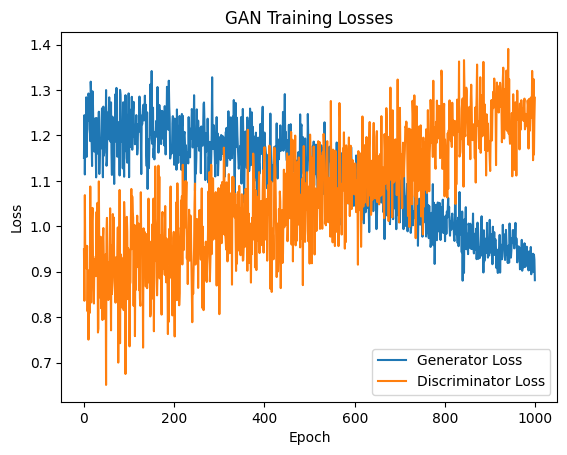

In [23]:
import matplotlib.pyplot as plt

plt.plot(history['gen'], label='Generator Loss')
plt.plot(history['dis'], label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('GAN Training Losses')
plt.show()


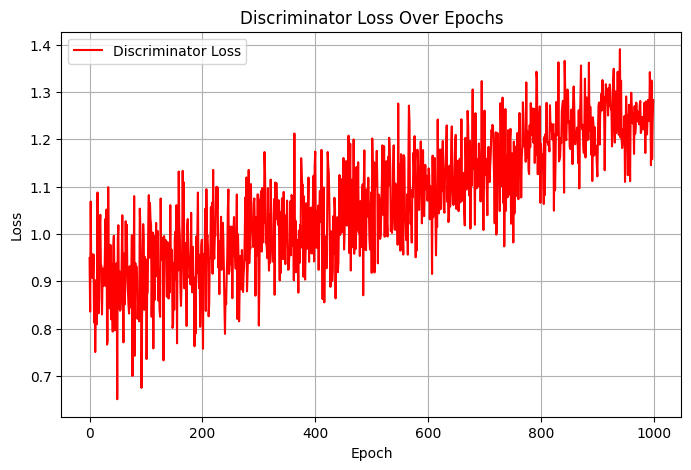

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history['dis'], label='Discriminator Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Imports matplotlib.pyplot: This line imports the necessary library for plotting and gives it the alias plt.
Creates a figure: plt.figure(figsize=(8, 5)) creates a new figure for the plot with a specified size.
Plots Discriminator Loss: plt.plot(history['dis'], label='Discriminator Loss', color='red') plots the values stored in the 'dis' key of the history dictionary. These values represent the discriminator loss recorded at the end of each epoch during training. A label and color are specified for this line.
Sets X-axis Label: plt.xlabel('Epoch') sets the label for the x-axis to 'Epoch'.
Sets Y-axis Label: plt.ylabel('Loss') sets the label for the y-axis to 'Loss'.
Sets Plot Title: plt.title('Discriminator Loss Over Epochs') sets the title of the plot.
Displays Legend: plt.legend() displays the legend on the plot, which shows the label for the plotted line.
Adds Grid: plt.grid(True) adds a grid to the plot for better readability.
Shows Plot: plt.show() displays the generated plot.

9705/9705 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


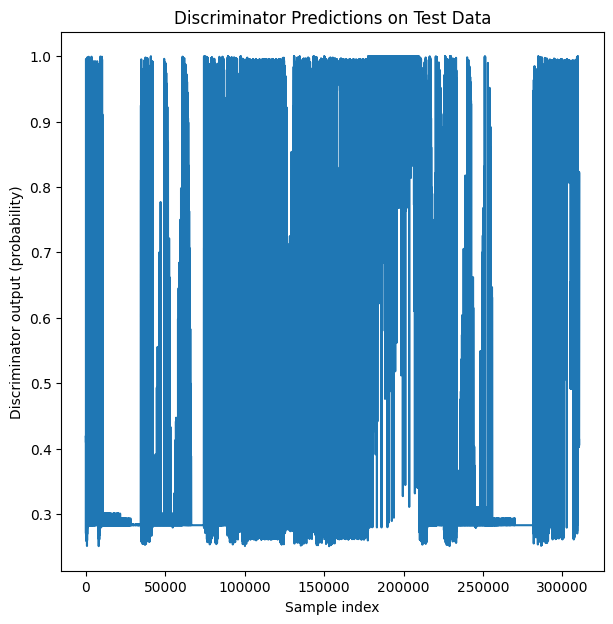

Accuracy: 0.3925816912430079
Recall: 0.33335462952610645
F1 Score: 0.4695533326396486
Average Precision: 0.8307500547710293


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, accuracy_score, recall_score, f1_score

# Prepare test data (no extra reshape, just numpy float32 array)
x_test = df.drop('label', axis=1).values.astype('float32')
y_test = df['label'].values

# Get raw discriminator output (logits)
y_pred_logits = discriminator.predict(x_test)

# Convert logits to probabilities with sigmoid
y_pred_prob = tf.sigmoid(y_pred_logits).numpy().reshape(-1)

# Plot discriminator output probabilities for each test sample
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred_prob)), y_pred_prob)
plt.ylabel('Discriminator output (probability)')
plt.xlabel('Sample index')
plt.title('Discriminator Predictions on Test Data')
plt.show()

# Threshold at 0.5 to get predicted labels
y_pred_label = (y_pred_prob > 0.5).astype(int)

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("Recall:", recall_score(y_test, y_pred_label))
print("F1 Score:", f1_score(y_test, y_pred_label))
print("Average Precision:", average_precision_score(y_test, y_pred_prob))



  Imports Libraries: Imports necessary libraries from tensorflow and sklearn.metrics for evaluation.
  Prepare test data:
        x_test = df.drop('label', axis=1).values.astype('float32'): Creates a NumPy array of the features from the df DataFrame (excluding the 'label' column) and ensures the data type is float32.
        y_test = df['label'].values: Extracts the true labels from the 'label' column into a NumPy array.
  Get raw discriminator output (logits): y_pred_logits = discriminator.predict(x_test) uses the trained discriminator model to make predictions on the test features (x_test). The output y_pred_logits contains the raw, unscaled outputs (logits) from the discriminator's final layer.
  Convert logits to probabilities with sigmoid: y_pred_prob = tf.sigmoid(y_pred_logits).numpy().reshape(-1) applies the sigmoid activation function to the logits to convert them into probabilities between 0 and 1. These probabilities represent the discriminator's confidence that a given sample is "real" (normal). The .numpy().reshape(-1) converts the TensorFlow tensor to a NumPy array and reshapes it into a 1D array.
  Plot discriminator output probabilities: This section generates a line plot showing the predicted probability for each sample in the test set. This visualization can help understand the distribution of the discriminator's output on the test data.
  Threshold at 0.5 to get predicted labels: y_pred_label = (y_pred_prob > 0.5).astype(int) converts the probabilities into binary class labels (0 or 1) by applying a threshold of 0.5. Samples with a probability greater than 0.5 are classified as 1 (likely attack), and those less than or equal to 0.5 are classified as 0 (likely normal).
  Calculate and print metrics: This section calculates and prints several evaluation metrics using scikit-learn:
        Accuracy: The proportion of correctly classified samples.
        Recall: The ability of the model to find all the positive samples (attacks in this case).
        F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
        Average Precision: Summarizes the precision-recall curve, providing a single value that represents the average precision across all possible recall values.


In [26]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, average_precision_score, recall_score

# Convert logits to probabilities
y_pred_prob = tf.sigmoid(y_pred_logits).numpy().reshape(-1)

prob_thresholds = [-0.2, -0.1, -0.05, 0, 0.005, 0.1]

for p in prob_thresholds:
    # Binary predictions using threshold p on probabilities
    pred_value = [1 if prob > p else 0 for prob in y_pred_prob]

    f1 = f1_score(y_test, pred_value)
    acc = accuracy_score(y_test, pred_value)
    precision = average_precision_score(y_test, y_pred_prob)  # Use probs, not hard preds
    recall = recall_score(y_test, pred_value)

    print(f'prob = {p:.3f} | f1 score = {f1:.4f} | accuracy = {acc:.4f} | precision = {precision:.4f} | recall = {recall:.4f}')
    print(f'Counts -> 0: {pred_value.count(0)}, 1: {pred_value.count(1)}\n')


prob = -0.200 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529

prob = -0.100 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529

prob = -0.050 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529

prob = 0.000 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529

prob = 0.005 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529

prob = 0.100 | f1 score = 0.8929 | accuracy = 0.8065 | precision = 0.8308 | recall = 1.0000
Counts -> 0: 0, 1: 310529



In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Prepare X, y
X = df.drop('label', axis=1)
y = df['label']

# Step 2: Encode categorical columns if any (example if columns are object dtype)
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Feature scaling (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize models
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)

# Step 6: Train models
rf.fit(X_train, y_train)             # Random Forest on original scale (tree-based, no scaling needed)
knn.fit(X_train_scaled, y_train)    # KNN on scaled data
lr.fit(X_train_scaled, y_train)     # Logistic Regression on scaled data

# Step 7: Predict
rf_preds = rf.predict(X_test)
knn_preds = knn.predict(X_test_scaled)
lr_preds = lr.predict(X_test_scaled)

# Step 8: Calculate accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Random Forest Accuracy: 0.9785313281593834
KNN Accuracy: 0.972423491020728
Logistic Regression Accuracy: 0.8996983651606394



  Import Libraries: Imports necessary libraries from numpy, pandas, and sklearn for data manipulation, model selection, preprocessing, and evaluation.
  Prepare X, y: Separates the features (X) from the target variable (y, which is the 'label' column) from the df DataFrame.
  Encode categorical columns: It checks for and encodes any categorical columns in X using LabelEncoder. (Note: based on previous steps, your X should already be numerical, but this is a good practice).
  Train-test split: Splits the data into training (70%) and testing (30%) sets using train_test_split. random_state=42 ensures the split is the same each time, and stratify=y ensures the proportion of normal and attack samples is similar in both sets.
  Feature scaling: Uses StandardScaler to scale the features. This is important for distance-based algorithms like KNN and regularization-based models like Logistic Regression. The scaler is fitted only on the training data and then used to transform both training and test data.
  Initialize models: Creates instances of RandomForestClassifier, KNeighborsClassifier, and LogisticRegression.
  Train models: Each model is trained (.fit()) on the respective training data. Random Forest is trained on the original X_train (as tree-based models are not sensitive to scaling), while KNN and Logistic Regression are trained on the scaled data (X_train_scaled).
  Predict: Predictions are made on the test data (.predict()) using the trained models. Again, KNN and Logistic Regression predict on the scaled test data (X_test_scaled).
  Calculate accuracy: The accuracy_score is calculated for each model by comparing the model's predictions to the actual y_test values.


# **Conclusion**

This project demonstrates the potential of combining deep learning-based anomaly detection (GANs) with classical machine learning models. While GANs offer an unsupervised and adaptive way to detect anomalies, traditional models like Random Forest provide competitive accuracy with simpler implementation. The discriminator from the GAN proved capable of distinguishing anomalous behavior based on learned patterns of normal traffic. The combined insights from both approaches contribute to more robust and flexible intrusion detection systems suitable for evolving cybersecurity landscapes.